In [1]:
import pyforest

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('customer_churn.csv')
data

<IPython.core.display.Javascript object>

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.shape

(7043, 21)

# Data Manipulation

In [4]:
#  a. Extract the 5th column & store it in ‘customer_5’

customer_5 = data.iloc[:,4]  # [row, columns] or [ start row : end row, start column : end column]
customer_5

customer_5 = data.loc[:,['Dependents']]
customer_5

customer_5 =data['Dependents']
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [5]:
# b.Extract the 15th column & store it in ‘customer_15’

customer_15= data.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [6]:
# c.Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

senior_male_electronic = data[(data['gender']=='Male') & (data['SeniorCitizen']== 1) & (data['PaymentMethod']=='Electronic check')]
senior_male_electronic


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [7]:
# d.Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

customer_total_tenure = data[(data['tenure']> 70) & (data['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
106,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,3508-CFVZL,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.9,No
6934,6257-DTAYD,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.15,7365.3,No
6992,0218-QNVAS,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),100.55,7113.75,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No


In [8]:
# e.Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes = data[(data['Contract']== 'Two year') & (data['PaymentMethod']== 'Mailed check') & (data['Churn']== 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [9]:
# f.Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’

customer_333 = data.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
406,4742-DRORA,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),95.40,5812,No
257,6655-LHBYW,Male,0,No,No,50,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),114.35,5791.1,No
833,2672-TGEFF,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.80,3340.55,No
5293,2242-MFOTG,Male,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),80.10,2603.3,No
6188,7542-CYDDM,Male,0,No,No,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,358.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,7963-GQRMY,Female,0,Yes,Yes,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.30,134.5,Yes
1712,6303-KFWSL,Female,0,No,No,29,Yes,Yes,DSL,No,...,No,No,No,No,One year,Yes,Electronic check,55.25,1620.2,No
4202,3146-JTQHR,Male,0,Yes,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.60,189.45,No
613,6689-VRRTK,Female,1,No,No,44,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.80,4860.35,No


In [10]:
# g. Get the count of different levels from the ‘Churn’, "Senior citizen", "InternetService" columns

value_count = data[['Churn','SeniorCitizen','InternetService']].apply(pd.Series.value_counts)
value_count


<IPython.core.display.Javascript object>

,Churn,SeniorCitizen,InternetService
No,5174.0,NaN,1526.0
Yes,1869.0,NaN,NaN
0,NaN,5901.0,NaN
1,NaN,1142.0,NaN
Fiber optic,NaN,NaN,3096.0
DSL,NaN,NaN,2421.0


In [11]:
# g. alternate way

print(data['Churn'].value_counts())
print(data['SeniorCitizen'].value_counts())
print(data['InternetService'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


# Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

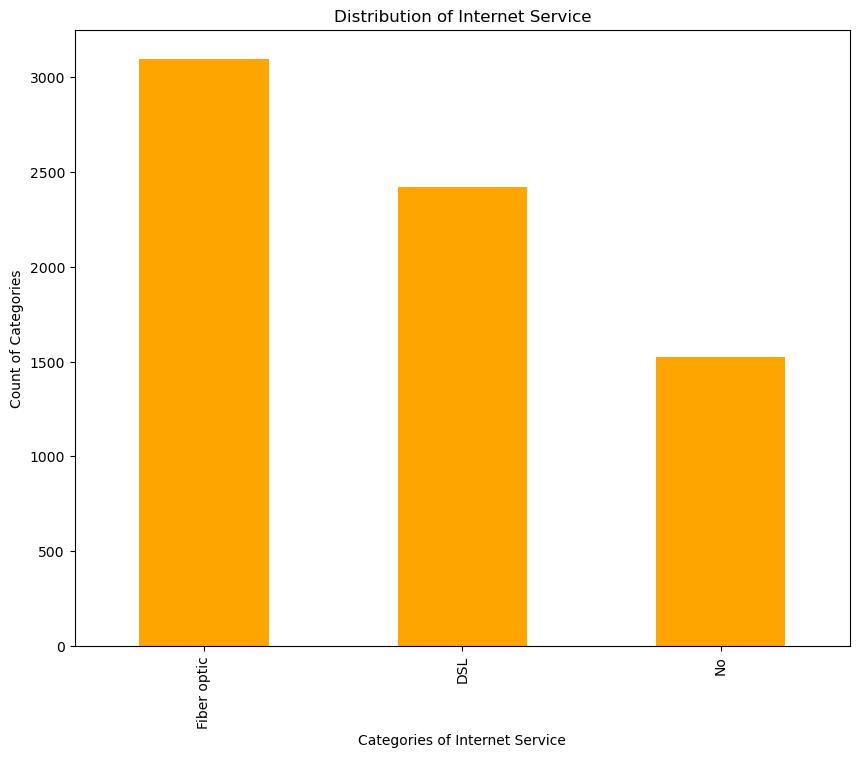

In [13]:
# a.Build a bar-plot for the ’InternetService’ column:

    # i.Set x-axis label to ‘Categories of Internet Service’

    # ii.Set y-axis label to ‘Count of Categories’
    
    # iii.Set the title of plot to be ‘Distribution of Internet Service’
    
    # iv.Set the color of the bars to be ‘orange’

# Count the occurrences of each category in the 'InternetService' column
internet_service_counts = data['InternetService'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
internet_service_counts.plot(kind='bar', color='orange')

# Setting labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Show the plot
plt.show()

X values ['Fiber optic', 'DSL', 'No']
Y values [3096, 2421, 1526]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of internet service')

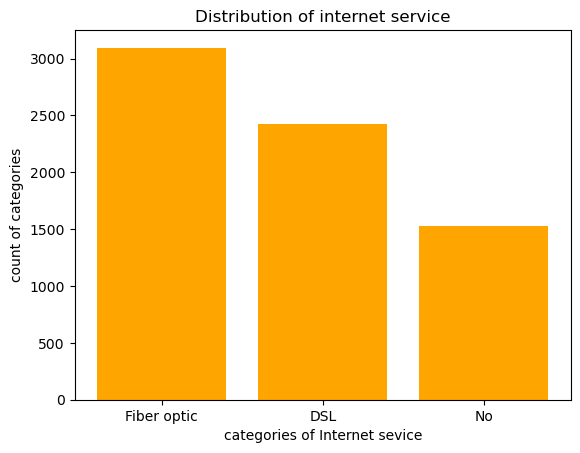

In [32]:
# another way

x=data['InternetService'].value_counts().keys().tolist()
print("X values" , x)
y=data['InternetService'].value_counts().tolist()
print("Y values" , y)

plt.bar(x,y,color='orange')
plt.xlabel("categories of Internet sevice")
plt.ylabel("count of categories")
plt.title("Distribution of internet service")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of tenure')

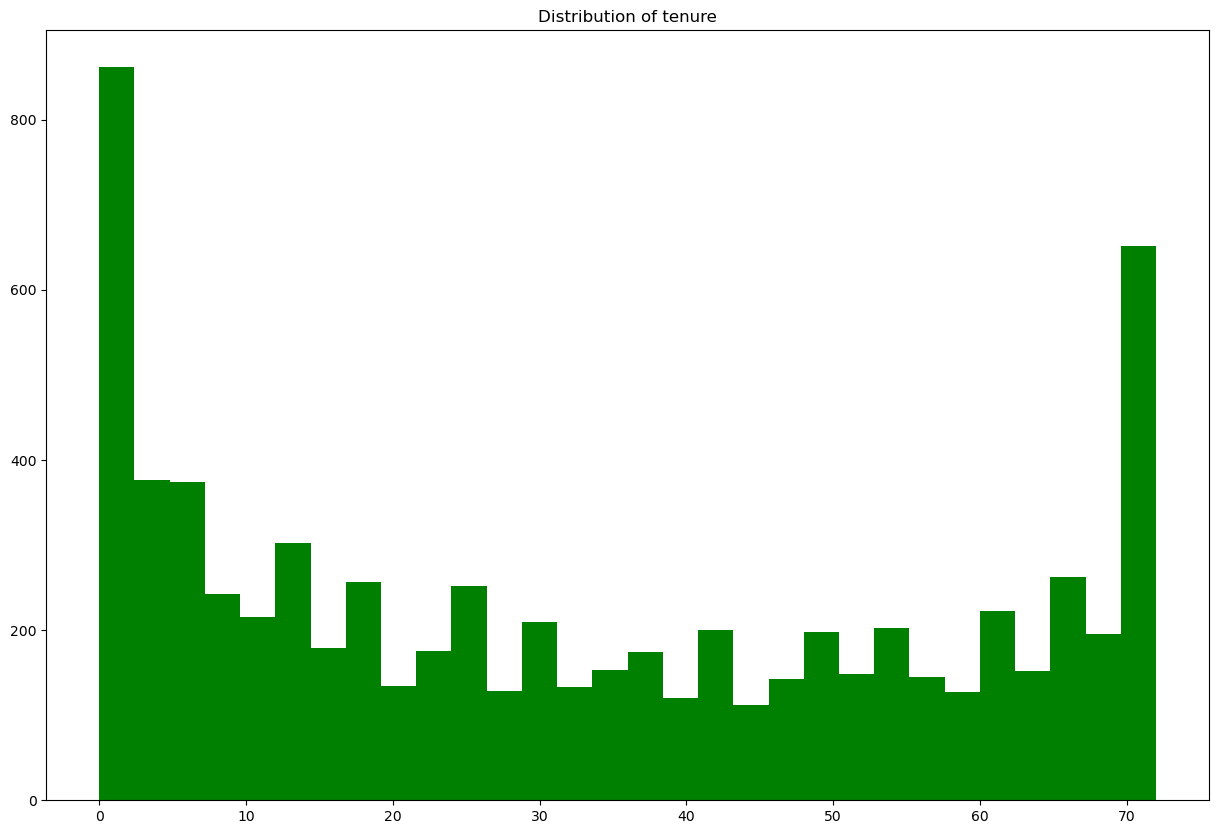

In [ ]:
# b.Build a histogram for the ‘tenure’ column:
    # i.Set the number of bins to be 30
    # ii.Set the color of the bins  to be ‘green’
    # iii.Assign the title ‘Distribution of tenure’
plt.figure(figsize=(15, 10))
plt.hist(data['tenure'], bins =30, color='green')
plt.title('Distribution of tenure')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

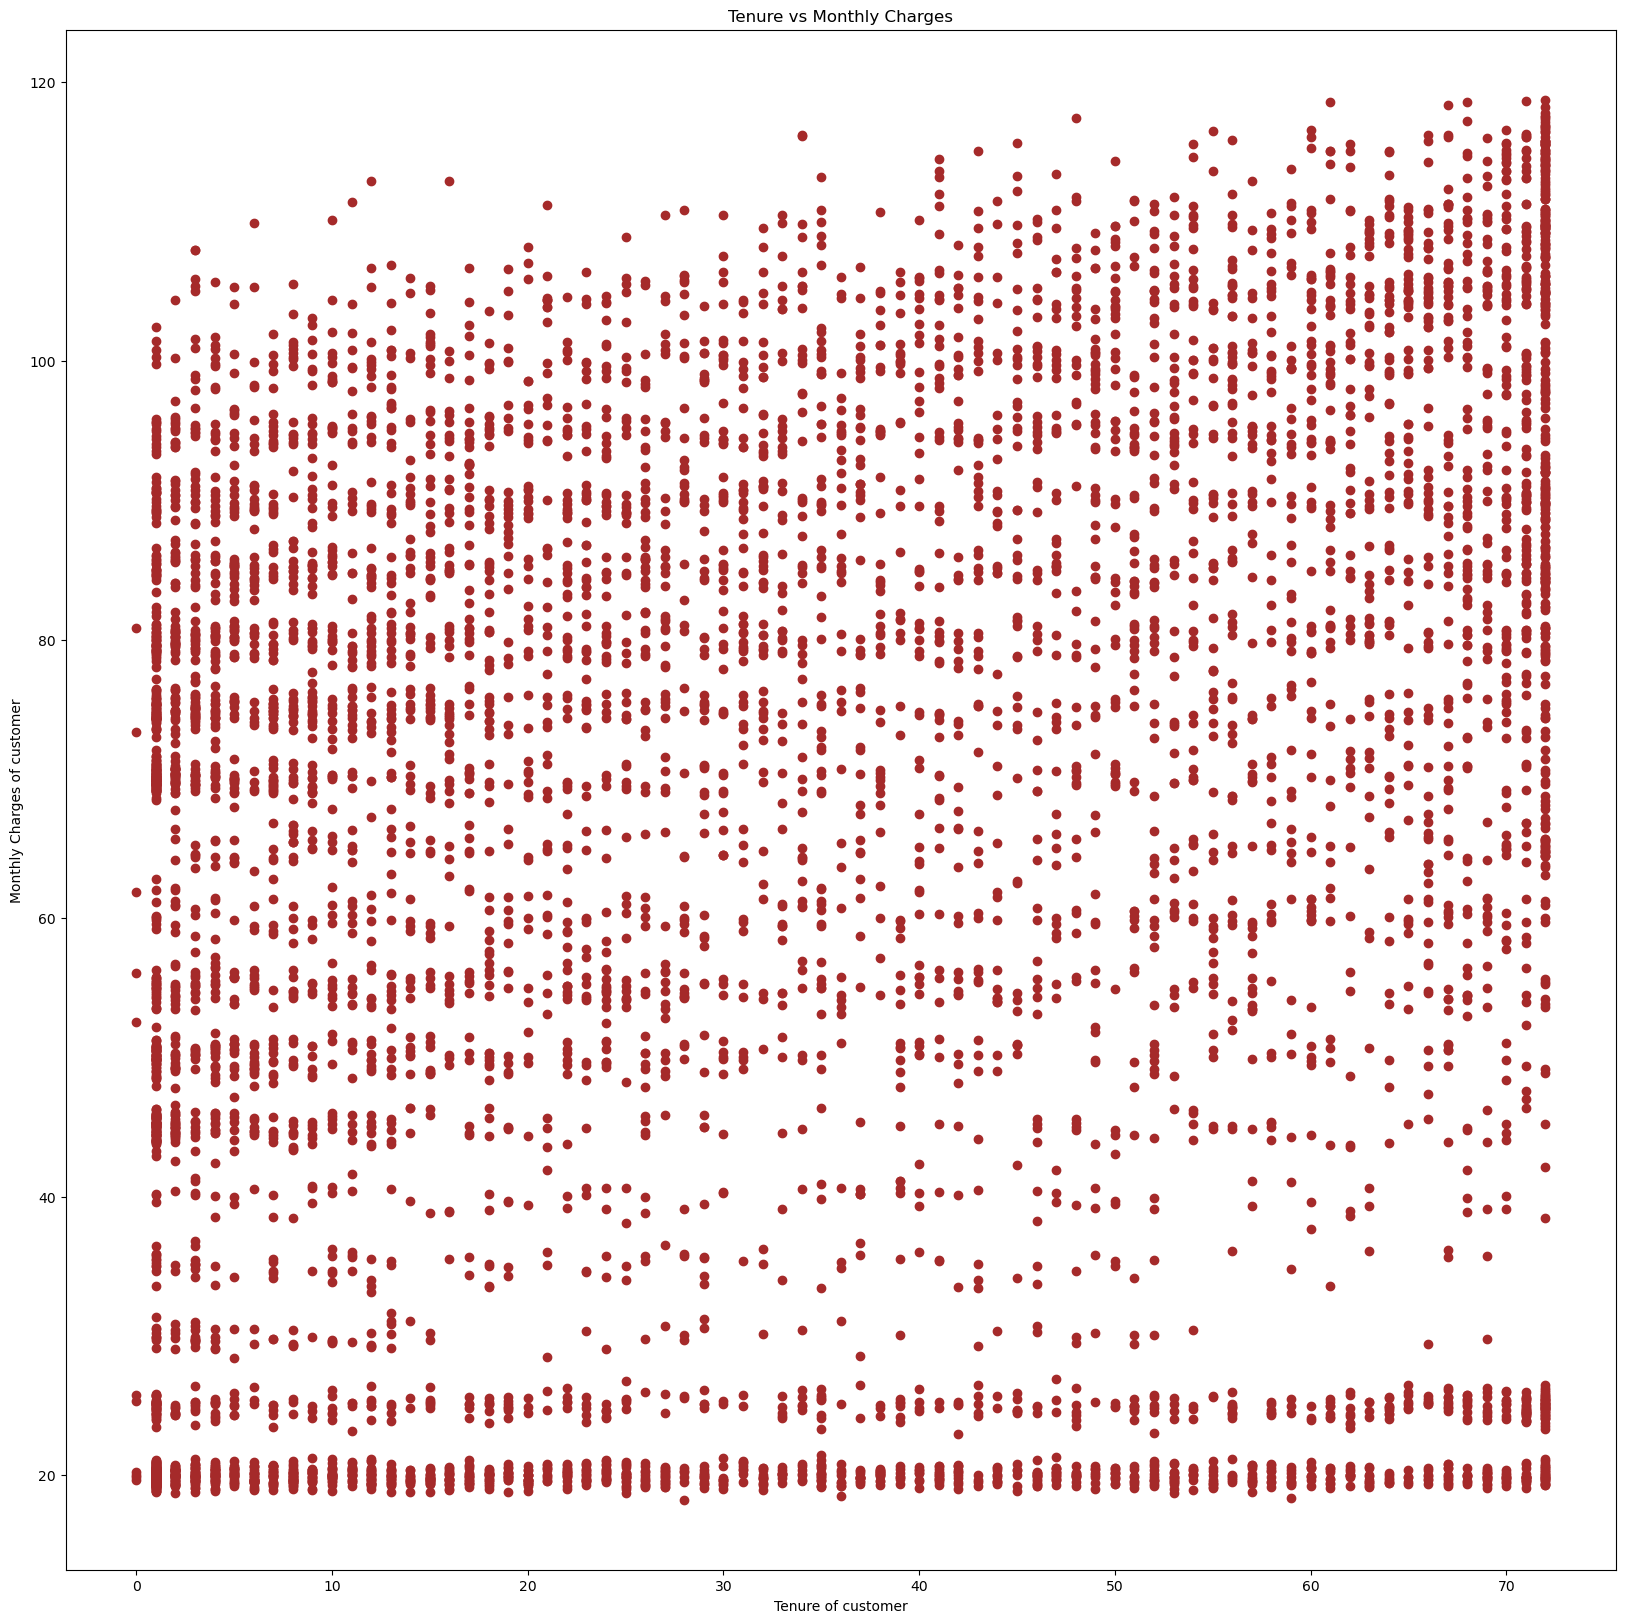

In [14]:
# c.Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
    # i.Assign the points a color of ‘brown’
    # ii.Set the x-axis label to ‘Tenure of customer’
    # iii.Set the y-axis label to ‘Monthly Charges of customer’
    # iv.Set the title to ‘Tenure vs Monthly Charges’

plt.figure(figsize=(20, 20))
plt.scatter(data=data, x='tenure', y='MonthlyCharges', color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

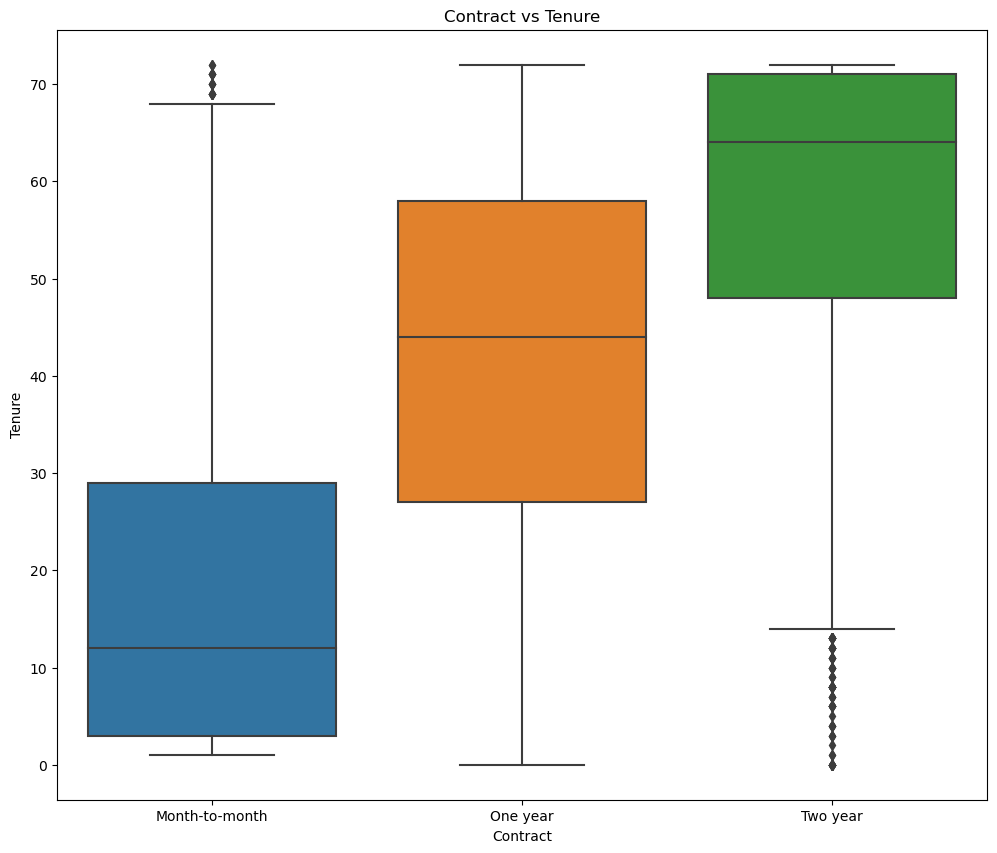

In [16]:
# d.Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 

plt.figure(figsize=(12, 10))
sns.boxplot(data= data, y= 'tenure', x='Contract')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Contract vs Tenure')
plt.show()

# Linear Regression

In [33]:
# a.Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
        #i.Divide the dataset into train and test sets in 70:30 ratio. 
        #ii.Build the model on train set and predict the values on test set
        #iii.After predicting the values, find the root mean square error
        #iv.Find out the error in prediction & store the result in ‘error’
        #v.Find the root mean square error
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
X = data[['tenure']]  # Independent variable
y = data['MonthlyCharges']  # Dependent variable

# Step 2: Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 3: Build the linear regression model on the train set
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model_linear.predict(X_test)

# Step 5: Evaluate the model
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 6: Find the error in prediction and store the result in 'error'
error = y_test - y_pred

# Display the results
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Sample of prediction errors:{error}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error (RMSE): 29.394584027273893
Sample of prediction errors:2200    -2.750896
4627    43.619033
3225    12.759602
2828   -35.219402
3768     6.236115
          ...    
4448    35.521524
1231     3.155688
3304    34.328286
4805   -46.083636
5843    15.954442
Name: MonthlyCharges, Length: 2113, dtype: float64


# Logistic Regression

In [51]:
# simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Step 1: Prepare the data
X = data[['MonthlyCharges']]  # Independent variable
y = data['Churn']  # Dependent variable

# Step 2: Split the dataset into train and test sets (65:35 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)

# Step 3: Build the logistic regression model on the train set
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model_logistic.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
[[1815    0]
 [ 651    0]]
Accuracy Score: 73.60
Classification Report:
              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1815
         Yes       0.00      0.00      0.00       651

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



In [54]:
# multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

# Step 1: Prepare the data
X = data[['MonthlyCharges','tenure']]  # Independent variable
y = data['Churn']  # Dependent variable

# Step 2: Split the dataset into train and test sets (65:35 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

# Step 3: Build the logistic regression model on the train set
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model_logistic.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
[[1634  181]
 [ 364  287]]
Accuracy Score: 77.90
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1815
         Yes       0.61      0.44      0.51       651

    accuracy                           0.78      2466
   macro avg       0.72      0.67      0.69      2466
weighted avg       0.76      0.78      0.77      2466



# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Step 1: Prepare the data
X = data[['tenure']]  # Independent variable
y = data['Churn']  # Dependent variable

# Step 2: Split the dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Build the decision tree model on the train set
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model_dt.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

<IPython.core.display.Javascript object>

Confusion Matrix:
[[965  76]
 [281  87]]
Accuracy Score: 74.66
Classification Report:
              precision    recall  f1-score   support

          No       0.77      0.93      0.84      1041
         Yes       0.53      0.24      0.33       368

    accuracy                           0.75      1409
   macro avg       0.65      0.58      0.59      1409
weighted avg       0.71      0.75      0.71      1409



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Step 1: Prepare the data
X = data[['tenure', 'MonthlyCharges']]  # Independent variables
y = data['Churn']  # Dependent variable

# Step 2: Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 3: Build the Random Forest model on the train set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

<IPython.core.display.Javascript object>

Confusion Matrix:
[[1347  213]
 [ 328  225]]
Accuracy Score: 74.40
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.86      0.83      1560
         Yes       0.51      0.41      0.45       553

    accuracy                           0.74      2113
   macro avg       0.66      0.64      0.64      2113
weighted avg       0.73      0.74      0.73      2113

